# Limpieza y transformación de datos

# Diccionario de variables

- **Unnamed:** Identificador sin uso analítico (columna residual).
- **Manufacturer:** Marca del dispositivo.
- **Category:** Tipo de equipo (notebook, ultrabook, etc.).
- **Screen:** Resolución o tipo de pantalla.
- **GPU:** Modelo y tipo de tarjeta gráfica.
- **OS:** Sistema operativo instalado.
- **CPU_core:** Número de núcleos del procesador.
- **Screen_Size_cm:** Tamaño de pantalla en centímetros.
- **CPU_frequency:** Frecuencia del procesador (GHz).
- **RAM_GB:** Memoria RAM en gigabytes.
- **Storage_GB_SSD:** Capacidad de almacenamiento SSD en GB.
- **Weight_kg:** Peso del equipo en kilogramos.
- **Price:** Precio del dispositivo.


In [51]:
#import os

# definimos el directorio de trabajo
#path = r'C:\PROYECTOS\data_analysis'
#os.chdir(path)
#print('Directorio actual:', os.getcwd())
#print('Archivos en el directorio: ', os.listdir())

Directorio actual: C:\PROYECTOS\data_analysis
Archivos en el directorio:  ['automobile.csv', 'clean_df.csv', 'laptops.csv', 'laptops_es.csv', 'laptops_limpio.csv']


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv'

In [61]:
df = pd.read_csv(file_path)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [63]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [64]:
df.tail()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
233,233,Lenovo,4,IPS Panel,2,1,7,35.560,2.6,8,256,1.70,1891
234,234,Toshiba,3,Full HD,2,1,5,33.782,2.4,8,256,1.20,1950
235,235,Lenovo,4,IPS Panel,2,1,5,30.480,2.6,8,256,1.36,2236
236,236,Lenovo,3,Full HD,3,1,5,39.624,2.5,6,256,2.40,883
237,237,Toshiba,3,Full HD,2,1,5,35.560,2.3,8,256,1.95,1499


In [65]:
# Eliminamos la columna de índice residual que no tiene uso analítico
df.drop('Unnamed: 0', axis=1, inplace=True)

## Evaluar datos faltantes 

In [66]:
missing_like = ['?', '--', 'N/A', 'n/a', '-', '', ' ',]
for column in df.columns:
    print(column)
    print(df[column].isin(missing_like).sum())

Manufacturer
0
Category
0
Screen
0
GPU
0
OS
0
CPU_core
0
Screen_Size_cm
0
CPU_frequency
0
RAM_GB
0
Storage_GB_SSD
0
Weight_kg
0
Price
0


In [67]:
df.isnull().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

In [68]:
missing_date = df.isnull()
missing_date.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [69]:
for column in missing_date.columns.values.tolist():
    print(column)
    print(missing_date[column].value_counts())
    print('')

Manufacturer
Manufacturer
False    238
Name: count, dtype: int64

Category
Category
False    238
Name: count, dtype: int64

Screen
Screen
False    238
Name: count, dtype: int64

GPU
GPU
False    238
Name: count, dtype: int64

OS
OS
False    238
Name: count, dtype: int64

CPU_core
CPU_core
False    238
Name: count, dtype: int64

Screen_Size_cm
Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

CPU_frequency
CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
Weight_kg
False    233
True       5
Name: count, dtype: int64

Price
Price
False    238
Name: count, dtype: int64



#### Se observan que cada columna cuenta con 238 registros y solo 2 de ellas poseen datos faltantes:
* Screen_Size_cm: 4 datos faltantes
* Weight_kg: 5 datos faltantes

## Reemplazar con el valor más frecuente

In [70]:
df['Screen_Size_cm'].value_counts()

Screen_Size_cm
39.624    89
35.560    64
38.100    23
33.782    20
33.020    18
43.942     7
43.180     5
31.750     4
30.480     4
Name: count, dtype: int64

In [71]:
# redondeamos los valores a 2 decimales
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df['Screen_Size_cm'].value_counts()

Screen_Size_cm
39.62    89
35.56    64
38.10    23
33.78    20
33.02    18
43.94     7
43.18     5
31.75     4
30.48     4
Name: count, dtype: int64

In [72]:
# reemplazar el valor con la moda
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
print("El valor más común: ", common_screen_size)
df['Screen_Size_cm'].replace(np.nan, common_screen_size)

El valor más común:  39.62


0      35.56
1      39.62
2      39.62
3      33.78
4      39.62
       ...  
233    35.56
234    33.78
235    30.48
236    39.62
237    35.56
Name: Screen_Size_cm, Length: 238, dtype: float64

## Reemplazar con la media

In [73]:
avg_weight_kg = df["Weight_kg"].astype("float").mean(axis=0)
print("Promedio de Weight_kg: ", avg_weight_kg)

Promedio de Weight_kg:  1.8622317596566522


In [74]:
df["Weight_kg"] = df["Weight_kg"].replace(np.nan, avg_weight_kg)

## Corregir los tipos de datos

In [75]:
df.dtypes

Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [76]:
df["Screen"].head()

0    IPS Panel
1      Full HD
2      Full HD
3    IPS Panel
4      Full HD
Name: Screen, dtype: object

In [77]:
df["Manufacturer"].head()

0    Acer
1    Dell
2    Dell
3    Dell
4      HP
Name: Manufacturer, dtype: object

#### El tipo de dato de cada variable es correcto

## Estandarización de Datos

In [78]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


#### convertir el peso de kg a libras y el tamaño de la pantalla de cm a pulgadas

In [79]:
# 1 pulgada = 2.54 cm
# 1 kg = 2.205 libras

# convertir peso de kg a libras
df["Weight_kg"] = df["Weight_kg"]*2.205
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

# convertir tamaño de pantalla de cm a pulgadas
df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)

## Normalización de Datos

In [80]:
df["CPU_frequency"].unique()

array([1.6, 2. , 2.7, 1.8, 2.5, 2.4, 2.8, 1.2, 2.9, 2.6, 2.3])

In [81]:
df['CPU_frequency'] = np.round(df['CPU_frequency']/df['CPU_frequency'].max(), 2)
print(df["CPU_frequency"].unique())

[0.55 0.69 0.93 0.62 0.86 0.83 0.97 0.41 1.   0.9  0.79]


## Agrupación por intervalos (Binning)

Text(0.5, 1.0, 'Price bins')

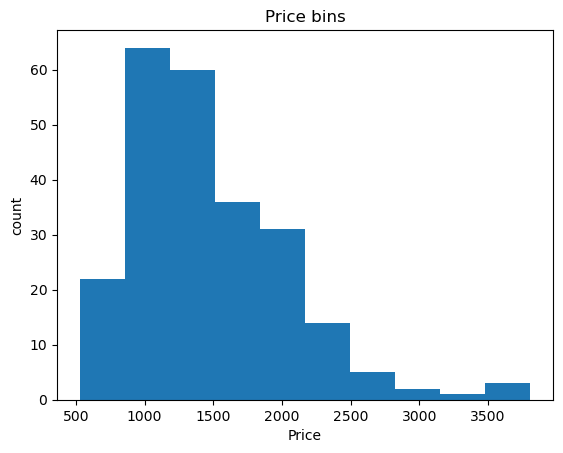

In [82]:
# graficamos un histograma para ver la distrubicion de precios
plt.hist(df['Price'])

plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

In [83]:
# crear los límites de los bins para la variable precio
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)

In [84]:
# asignar nombres a los bins
group_names = ["Low", "Medium", "High"]

In [85]:
# asignar los valores a los bins
df["Price-binned"] = pd.cut(df["Price"], bins, labels=group_names, include_lowest=True)
df[["Price", "Price-binned"]].head()

,Price,Price-binned
0,978,Low
1,634,Low
2,946,Low
3,1244,Low
4,837,Low


In [86]:
df[["Price", "Price-binned"]].tail()

,Price,Price-binned
233,1891,Medium
234,1950,Medium
235,2236,Medium
236,883,Low
237,1499,Low


In [87]:
# Contar cuántos en cada bin
print(df['Price-binned'].value_counts())

Price-binned
Low       160
Medium     72
High        6
Name: count, dtype: int64


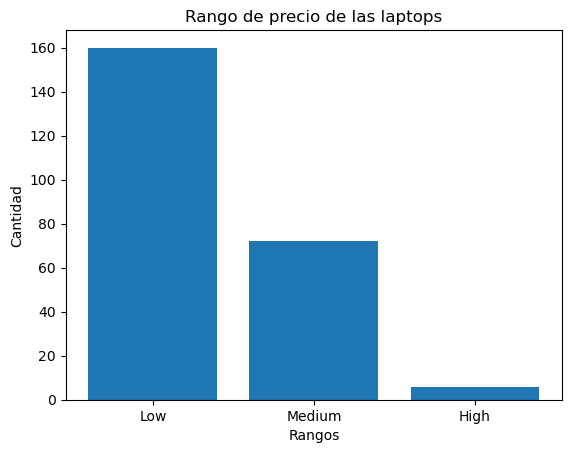

In [88]:
# distribución en cada bin
plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Rangos")
plt.ylabel("Cantidad")
plt.title("Rango de precio de las laptops")
plt.show()

## Variables indicadoras

- Convertir variables categóricas numéricas binarias.

In [89]:
df["Screen"].unique()

array(['IPS Panel', 'Full HD'], dtype=object)

In [90]:
# asigna valores númericos binarios a cada categoría (filas).
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.head()

,Full HD,IPS Panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False


In [91]:
# Cambiar los nombres de las columnas para mayor claridad
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
dummy_variable_1.head()

,Screen-Full_HD,Screen-IPS_panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False


In [92]:
# fusionar al dataframe "df", "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

# eliminar la columna original "Screen" del df
df.drop("Screen", axis=1, inplace=True)

In [93]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.000000,0.55,8,256,3.52800,978,Low,False,True
1,Dell,3,1,1,3,15.598425,0.69,4,256,4.85100,634,Low,True,False
2,Dell,3,1,1,7,15.598425,0.93,8,256,4.85100,946,Low,True,False
3,Dell,4,2,1,5,13.299213,0.55,8,128,2.69010,1244,Low,False,True
4,HP,4,2,1,7,15.598425,0.62,8,256,4.21155,837,Low,True,False


In [95]:
df.to_csv("laptops_limpio.csv", index=False)